**1**. Making wallpaper with `fromfunction`

Adapted from [Circle Squared](http://igpphome.ucsd.edu/~shearer/COMP233/SciAm_Mandel.pdf)

Create a $400 \times 400$ array using the function `lambda i, j:  0.27**2*(i**2 + j**2) % 1.5`. Use `imshow` from `matplotlib.pyplot` with `interpolation='nearest'` and the `YlOrBr` colormap to display the resulting array as an image.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

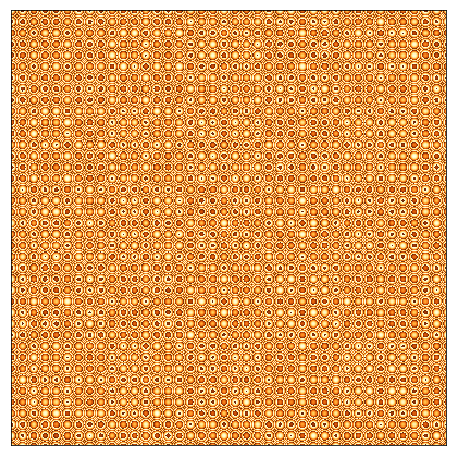

In [2]:
xs = np.fromfunction(lambda i, j:  0.27**2*(i**2 + j**2) % 1.5, 
                     (400, 400),)
plt.figure(figsize=(8,8))
plt.imshow(xs, interpolation='nearest', cmap=plt.cm.YlOrBr)
plt.xticks([])
plt.yticks([])
pass

**2**. Find t least squares solution for $\beta_0, \beta_1, \beta_2$ using the normal equations $\hat{\beta} = (X^TX)^{-1}x^Ty$.

\begin{align}
10 &= \beta_0 + 3 \beta_1  + 7 \beta_2 \\
11 &= \beta_0 + 2 \beta_1  + 8 \beta_2 \\
9 &= \beta_0 + 3 \beta_1 + 7 \beta_2 \\
10 &= \beta_0 + 1 \beta_1 + 9 \beta_2 \\
\end{align}

You can find the inverse of a matrix by using `np.linalg.inv` and the transpose with `X.T`

In [5]:
y = np.array([10,11,9,10]).reshape(-1,1)
X = np.c_[np.ones(4), [3,2,3,1], [7,8,8,9]]

In [6]:
X

array([[1., 3., 7.],
       [1., 2., 8.],
       [1., 3., 8.],
       [1., 1., 9.]])

In [7]:
y

array([[10],
       [11],
       [ 9],
       [10]])

In [5]:
X.shape, y.shape

((4, 3), (4, 1))

Direct translation of normal equations

In [6]:
β = np.linalg.inv(X.T @ X) @ X.T @ y

In [7]:
β

array([[23.66666667],
       [-1.33333333],
       [-1.33333333]])

More numerically stable version

In [8]:
β = np.linalg.solve(X.T @ X,  X.T @ y)

In [9]:
β

array([[23.66666667],
       [-1.33333333],
       [-1.33333333]])

Compare observed with fitted

In [10]:
np.c_[y, X @ β]

array([[10.        , 10.33333333],
       [11.        , 10.33333333],
       [ 9.        ,  9.        ],
       [10.        , 10.33333333]])

In [11]:
from mpl_toolkits.mplot3d import Axes3D

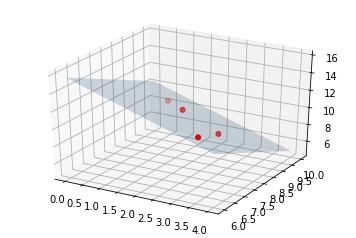

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
u = np.linspace(0, 4, 2)
v = np.linspace(6, 10, 2)
U, V = np.meshgrid(u, v)
Z = β[0] + U*β[1] +V*β[1]
ax.scatter(X[:,1] , X[:,2] , y,  color='red', s=25)
ax.plot_surface(U, V, Z, alpha=0.2)
ax.view_init(elev=30, azim=-60)